# Parse the recipe ingredients into a standardized format 


In [3]:
import pymongo 
import nltk
import collections
import pandas as pd

%matplotlib inline

In [4]:
client = pymongo.MongoClient("mongodb://localhost/27017/")

In [5]:
ar_db = client.allrecipes

In [6]:
ar_db.recipes.find_one().keys()

[u'Cholesterol',
 u'nutrition',
 u'Carbs',
 u'recipe_times',
 u'nutrition_elements',
 u'Sodium',
 u'name',
 u'nutrition_serving_info',
 u'description',
 u'Calories',
 u'Fat',
 u'servings_config',
 u'recipe_ID',
 u'rating_list',
 u'servings',
 u'nutrition_info',
 u'Protein',
 u'_id',
 u'page',
 u'directions_list',
 u'ingredients_list']

In [7]:
print "number of recipes in database:", ar_db.recipes.count()

number of recipes in database: 11111


In [8]:
# How many ingredients are there in a recipe? 

In [9]:
# Get a dict of all ingredients 
all_ingredients = {a['recipe_ID']:a['ingredients_list'] for a in ar_db.recipes.find({"ingredients_list":{"$exists":True}})}


In [10]:
all_ingredients.items()[1]

(u'228057',
 [u'1 bunch collard greens, chopped',
  u'1 (16 ounce) package hickory-smoked bacon, diced',
  u'1/2 cup butter',
  u'1 large onion, chopped',
  u'2 cubes chicken bouillon, crumbled',
  u'1 cup water',
  u'4 cloves garlic, minced',
  u'1/2 teaspoon dried oregano',
  u'1 pinch ground thyme, or to taste',
  u'1 pinch dried savory, or to taste',
  u'4 teaspoons milk'])

In [11]:
ingredients_counter = collections.Counter([len(a) for a in all_ingredients.values()])

In [12]:
ingredients_counter

Counter({0: 280,
         1: 12,
         2: 59,
         3: 272,
         4: 506,
         5: 867,
         6: 1042,
         7: 1170,
         8: 1194,
         9: 1161,
         10: 1041,
         11: 810,
         12: 706,
         13: 548,
         14: 404,
         15: 286,
         16: 230,
         17: 185,
         18: 83,
         19: 82,
         20: 53,
         21: 33,
         22: 30,
         23: 18,
         24: 13,
         25: 6,
         26: 6,
         27: 2,
         28: 4,
         29: 3,
         30: 1,
         31: 1,
         32: 1,
         33: 1,
         44: 1})

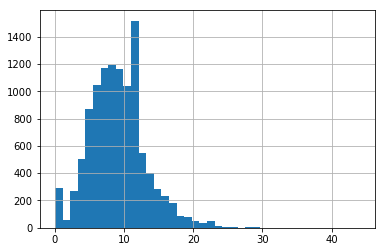

In [13]:
# Histogram of the number of ingredients in recipes 
pd.Series(len(a) for a  in all_ingredients.values()).hist(bins=40)

In [14]:
# Number of ingredients peaks at ~8.  
# Can a recipe really have 32 items?  How annoying.  
from itertools import izip as zip, count
[(i,j) for i, j in zip(count(), all_ingredients) if len(all_ingredients[j])> 30]

[(5661, u'220871'), (8638, u'246781'), (9171, u'231087'), (10406, u'63008870')]

In [15]:
all_ingredients['63008870'] # how anal!

[u'Dash = Less than 1/8 Tsp',
 u'1/2 Tbs = 1 1//2 Tsp',
 u'1 Tbs = 3 Tsp',
 u'1/8 Cup = 2 Tbs',
 u'1/4 Cup = 4 Tbs',
 u'1/3 Cup = 5 Tbs',
 u'1/2 Cup = 8 Tbs',
 u'3/4 Cup = 12 Tbs',
 u'1 Cup = 16 Tbs',
 u'1 Pint = 2 Cups = 16 Fluid ounces',
 u'1 Quart = 4 Cups = 2 Pints = 32 Fluid ounce',
 u'1 Gallon = 16 Cups = 4 Quarts',
 u'33 whole wafers = 1c crushed wafers = 135 grams = 4oz.10 whole wafers = 1/2c whole wafers = 1/4c crushed = 40 grams = 1.5oz',
 u'BUTTER',
 u'2 Cups = 1 lb = 4 sticks',
 u'1 Cup = 1/2 lb = 2 Sticks',
 u'1/2 Cup =8 tbs = 1 stick',
 u'1/4 Cup = 1/2 stick = 4 tbs',
 u'CHOCOLATE',
 u'1 6oz Pkg chips = 1 cup or 6 1oz Squares semisweet chocolate',
 u'COCOA unsweetened',
 u'1 8oz Can = 2 cups',
 u'COCONUT,flaked',
 u'3 1/2ozs = 1 1/3 cups',
 u'CREAM CHEESE',
 u'1 3 oz Pkg = 6 tbs',
 u'1 8 oz Pkg = 1 cup',
 u'FLOUR',
 u'White or all purpose 1 lb = 3 1/2 to 4 cups',
 u'Whole wheat 1 lb = 3 3/4 to 4 cups',
 u'HONEY',
 u'16 Oz = 1 1/2 cups',
 u'MARSHMALLOWS',
 u'1 Cup cut up =

In [16]:
# look at a sample ingredients_list
sample_list = ar_db.recipes.find_one()['ingredients_list']
sample_list

[u'1/2 cup butter',
 u'1/2 cup white sugar',
 u'1/3 cup packed brown sugar',
 u'1/2 cup peanut butter',
 u'1/2 teaspoon vanilla extract',
 u'1 egg',
 u'1 cup all-purpose flour',
 u'1 teaspoon baking soda',
 u'1/4 teaspoon salt',
 u'1/2 cup rolled oats',
 u'1 cup semisweet chocolate chips']

In [17]:
# tokenize each item, including punctuation
ingredients_tokenized = [(a[0],[nltk.word_tokenize(b) for b in a[1]]) for a in all_ingredients.items()]
ingredients_tokenized[0]

(u'73468',
 [[u'4', u'cups', u'water', u',', u'divided'],
  [u'1',
   u'1/2',
   u'tablespoons',
   u'plain',
   u'yogurt',
   u'with',
   u'active',
   u'cultures'],
  [u'1', u'3/4', u'cups', u'dry', u'milk', u'powder']])

In [18]:
nltk.pos_tag?

In [19]:
# get part of speech tags 
ingredients_pos = [(a[0], [nltk.pos_tag(b) for b in a[1]]) for a in ingredients_tokenized]
ingredients_pos[0]

(u'73468',
 [[(u'4', 'CD'),
   (u'cups', 'NNS'),
   (u'water', 'NN'),
   (u',', ','),
   (u'divided', 'VBD')],
  [(u'1', 'CD'),
   (u'1/2', 'CD'),
   (u'tablespoons', 'NNS'),
   (u'plain', 'VBP'),
   (u'yogurt', 'NN'),
   (u'with', 'IN'),
   (u'active', 'JJ'),
   (u'cultures', 'NNS')],
  [(u'1', 'CD'),
   (u'3/4', 'CD'),
   (u'cups', 'NNS'),
   (u'dry', 'JJ'),
   (u'milk', 'NN'),
   (u'powder', 'NN')]])

In [20]:
ingredients_tokenized[0]

(u'73468',
 [[u'4', u'cups', u'water', u',', u'divided'],
  [u'1',
   u'1/2',
   u'tablespoons',
   u'plain',
   u'yogurt',
   u'with',
   u'active',
   u'cultures'],
  [u'1', u'3/4', u'cups', u'dry', u'milk', u'powder']])

In [21]:
all_ingredients['73468']

[u'4 cups water, divided',
 u'1 1/2 tablespoons plain yogurt with active cultures',
 u'1 3/4 cups dry milk powder']

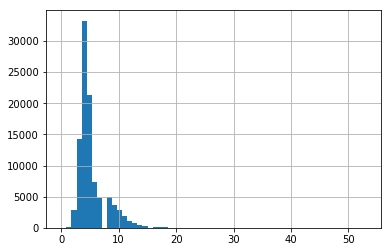

In [22]:
# Histogram of number of tokens per ingredient 
pd.Series([len(b) for a in ingredients_tokenized for b in a[1]]).hist(bins=60)

In [23]:
# complie set of terms used for units 
unit_elements = {'bunch', 'clove', 'cloves', 'cup', 'cups', 'gallons', 'lb', 'lbs', 'liter', 
                 'liters', 'ounce', 'ounces', 'pinch', 
                 'pint', 'pints', 'pounds', 'quart', 'quarts', 'sprig', 'stick', 'tablespoon',
                 'tablespoons', 'tbsp', 'teaspoon', 'teaspoons', 'tsp', 'package', 'packages'}

In [24]:
# To access key desriptions for parts of speech: 
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


## Parsing ingredients list 
The goal is to extract information pertaining to amount and identity.  

Quantity phrases are composed of:  
numeric (integer, decimal, (integer plus fraction) greater than 0, and unit (optional)
Identity phrases are a collection of 
nouns, adjectives, verb (past tense)

### Features: 
* number of phrases (tokens)
* tags of tokens 
* encapsulation punctuation (parentheses)

### Cases: 
1. number of tokens is 0: toss.  
1. number of tokens is 1: unquantified ingredient
1. number of tokens is 2: 
    1. if 1st token is numeric, 2nd is noun: [quantity] [ingredient noun] 
    1. if both are nouns: [ingredient phrase] 
1. number of tokens is 3: 
    1. [quantity] [unit] [ingredient noun] 
    1. [quantity] [ingredient phrase]
    1. [ingredient phrase] 
1. number of tokens is 4 or more: 
    1. all of above 
    1. [quantity] [(other quantity plus unit)] [ingredient phrase]
    
    
[quantity] [unit] [ingredient bag of words]

In [25]:
def to_numeric(str): 
    '''turn string representation of fractions to float'''
    if "/" in str: 
        ind = str.index("/")
        return float(str[:ind])/float(str[ind+1:])
    return float(str)

In [26]:
to_numeric("1/2")

0.5

In [27]:
def parse_ingredient(tagged_list): 
    """Transform pos tagged ingredient into standardized format
    Input: list of pos-tagged ingredient 
    Returns: parsed list of ingredient: [<float:quantity>. 
                                         <string:unit>, 
                                         <list:tokenized ingredient terms>] 
    
    """
    token_list = [a[0] for a in tagged_list]
    if ("(" in token_list) and (")" in token_list): 
        if token_list.count("(") > 1: 
            print "More than one parenthesis: needs more work"
        else: 

            parens = token_list[token_list.index("("):token_list.index(")")+1]
            print "   Tokens in parenthesis, ignored for now:", parens
            tagged_list =  tagged_list[:token_list.index("(")] + tagged_list[token_list.index(")")+1:]
    list_len = len(tagged_list)
    if list_len == 0: 
        return None 
    if list_len == 1: 
        return (None, "unit", [tagged_list[0][0]])
    if list_len == 2: 
        if tagged_list[0][1] == 'CD': 
            return (float(tagged_list[0][0]), "unit", [tagged_list[1][0]])
        else: 
            return ([a[0] for a in tagged_list])
    if list_len == 3: 
        if tagged_list[0][1] == "CD": 
            if tagged_list[1][0] in unit_elements: 
                return (to_numeric(tagged_list[0][0]), 
                        tagged_list[1][0], 
                        [tagged_list[2][0]])
            elif tagged_list[1][1] == "CD": 
                    return (to_numeric(tagged_list[0][0]) + float(tagged_list[1][0]), 
                            'unit', 
                            [tagged_list[2][0]])
            else:
                return (to_numeric(tagged_list[0][0]), 
                        "unit", 
                        [a[0] for a in tagged_list[1:]])
        else: 
            return (None, "unit", [a[0] for a in tagged_list])
    if list_len > 3: 
        if (tagged_list[0][1] == 'CD') and (tagged_list[1][1] == 'CD') and (tagged_list[2][0] in unit_elements): 
             return (to_numeric(tagged_list[0][0]) + to_numeric(tagged_list[1][0]), 
                                                           tagged_list[2][0], 
                                                           [a[0] for a in tagged_list[3:]])
        elif parse_ingredient(tagged_list[:3]): 
            list1 = list(parse_ingredient(tagged_list[:3]))
            list1[2].extend([a[0] for a in tagged_list[3:]]) 
            return tuple(list1)

In [28]:
# Try on a sample.
# original ingredients_list:
all_ingredients[ingredients_pos[1][0]]

[u'1 bunch collard greens, chopped',
 u'1 (16 ounce) package hickory-smoked bacon, diced',
 u'1/2 cup butter',
 u'1 large onion, chopped',
 u'2 cubes chicken bouillon, crumbled',
 u'1 cup water',
 u'4 cloves garlic, minced',
 u'1/2 teaspoon dried oregano',
 u'1 pinch ground thyme, or to taste',
 u'1 pinch dried savory, or to taste',
 u'4 teaspoons milk']

In [29]:
ingredients_pos[1][1]

[[(u'1', 'CD'),
  (u'bunch', 'JJ'),
  (u'collard', 'NN'),
  (u'greens', 'NNS'),
  (u',', ','),
  (u'chopped', 'VBD')],
 [(u'1', 'CD'),
  (u'(', '('),
  (u'16', 'CD'),
  (u'ounce', 'NN'),
  (u')', ')'),
  (u'package', 'NN'),
  (u'hickory-smoked', 'JJ'),
  (u'bacon', 'NN'),
  (u',', ','),
  (u'diced', 'VBD')],
 [(u'1/2', 'CD'), (u'cup', 'NN'), (u'butter', 'NN')],
 [(u'1', 'CD'),
  (u'large', 'JJ'),
  (u'onion', 'NN'),
  (u',', ','),
  (u'chopped', 'VBD')],
 [(u'2', 'CD'),
  (u'cubes', 'NNS'),
  (u'chicken', 'VBN'),
  (u'bouillon', 'NN'),
  (u',', ','),
  (u'crumbled', 'VBD')],
 [(u'1', 'CD'), (u'cup', 'NN'), (u'water', 'NN')],
 [(u'4', 'CD'),
  (u'cloves', 'NNS'),
  (u'garlic', 'JJ'),
  (u',', ','),
  (u'minced', 'VBD')],
 [(u'1/2', 'CD'), (u'teaspoon', 'NN'), (u'dried', 'VBD'), (u'oregano', 'NN')],
 [(u'1', 'CD'),
  (u'pinch', 'NN'),
  (u'ground', 'NN'),
  (u'thyme', 'NN'),
  (u',', ','),
  (u'or', 'CC'),
  (u'to', 'TO'),
  (u'taste', 'VB')],
 [(u'1', 'CD'),
  (u'pinch', 'NN'),
  (u'dri

In [30]:
for i,a in enumerate(ingredients_pos[1][1]): 
    print i, parse_ingredient(a)

0 (1.0, u'bunch', [u'collard', u'greens', u',', u'chopped'])
1 Tokens in parenthesis, ignored for now: [u'(', u'16', u'ounce', u')']
(1.0, u'package', [u'hickory-smoked', u'bacon', u',', u'diced'])
2 (0.5, u'cup', [u'butter'])
3 (1.0, 'unit', [u'large', u'onion', u',', u'chopped'])
4 (2.0, 'unit', [u'cubes', u'chicken', u'bouillon', u',', u'crumbled'])
5 (1.0, u'cup', [u'water'])
6 (4.0, u'cloves', [u'garlic', u',', u'minced'])
7 (0.5, u'teaspoon', [u'dried', u'oregano'])
8 (1.0, u'pinch', [u'ground', u'thyme', u',', u'or', u'to', u'taste'])
9 (1.0, u'pinch', [u'dried', u'savory', u',', u'or', u'to', u'taste'])
10 (4.0, u'teaspoons', [u'milk'])
